# GARCH Stock Forecasting

## Read Data

In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [2]:
# start = datetime(2015, 1, 1)
# end = datetime(2020, 6, 10)

In [3]:
# dis = web.DataReader('DIS', 'yahoo', start=start, end=end)
dis = pd.read_csv("store.csv",header=0,index_col=0)
dis["Date"] = pd.to_datetime(dis["Date"])
dis.set_index('Date', inplace=True)
dis.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2004-04-07,59.43,59.62,58.60,59.03,4543601
2004-04-08,58.96,60.13,58.06,58.79,7301119
2004-04-12,55.26,59.53,55.26,58.38,2854237
2004-04-13,58.50,60.47,57.62,60.06,4000517
2004-04-15,60.00,60.82,59.48,60.14,4575190
2004-04-16,60.38,61.04,59.91,60.31,3626010
2004-04-17,60.38,60.85,60.04,60.57,1250135
2004-04-19,60.84,61.32,59.10,59.34,3597939
2004-04-20,59.43,59.78,58.78,59.50,2719601


In [4]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

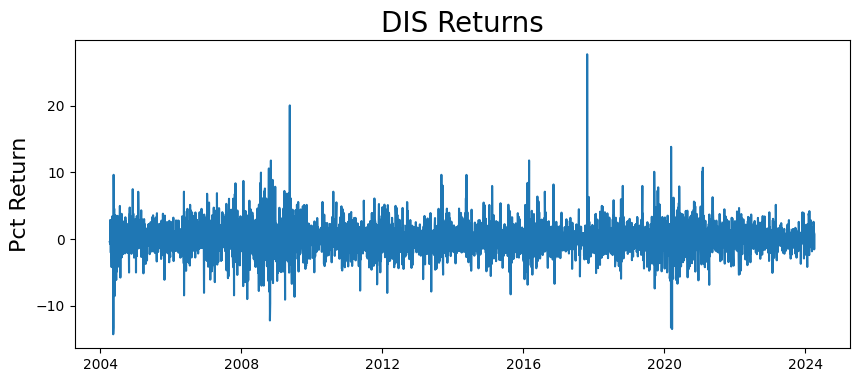

In [5]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

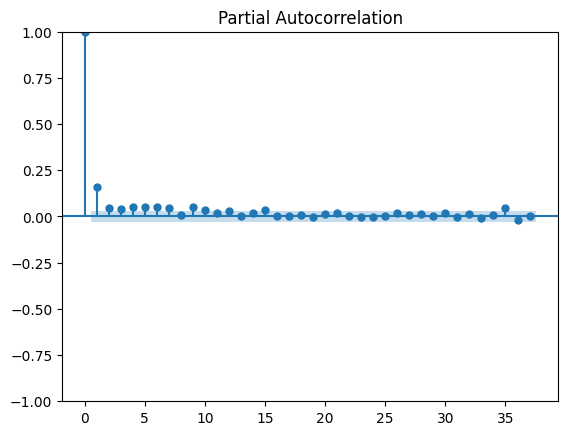

In [6]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [7]:
model = arch_model(returns, p=3, q=3)

In [8]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 23588.940633220176
Iteration:      2,   Func. Count:     22,   Neg. LLF: 2372463.6188778393
Iteration:      3,   Func. Count:     32,   Neg. LLF: 14223.542991627
Iteration:      4,   Func. Count:     43,   Neg. LLF: 35639.58511213096
Iteration:      5,   Func. Count:     53,   Neg. LLF: 11294.267994215794
Iteration:      6,   Func. Count:     64,   Neg. LLF: 10965.429144469636
Iteration:      7,   Func. Count:     74,   Neg. LLF: 10882.166114680615
Iteration:      8,   Func. Count:     84,   Neg. LLF: 10832.412070475515
Iteration:      9,   Func. Count:     94,   Neg. LLF: 10810.289121031677
Iteration:     10,   Func. Count:    104,   Neg. LLF: 10832.330100279582
Iteration:     11,   Func. Count:    114,   Neg. LLF: 10800.60695293619
Iteration:     12,   Func. Count:    123,   Neg. LLF: 10799.788456823997
Iteration:     13,   Func. Count:    132,   Neg. LLF: 10799.76033006531
Iteration:     14,   Func. Count:    141,   Neg. LLF: 107

In [9]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -10799.8
Distribution:                  Normal   AIC:                           21615.5
Method:            Maximum Likelihood   BIC:                           21667.6
                                        No. Observations:                 4976
Date:                Mon, Apr 08 2024   Df Residuals:                     4975
Time:                        01:34:58   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0885  2.924e-02      3.026  2.480e-03 [3.116e-02,  0.146]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4417      0.181      2.435  1.491e-02  [8.612e-02,  0.797]
alpha[1]       0.1924  7.457e-02      2.580  9.878e-03  [4.624e-02,  0.339]
alpha[2]       0.0323  6.409e-02      0.504      0.614 [-9.331e-02,  0.158]
alpha[3]   4.3863e-13  5.265e-02  8.332e-12      1.000    [ -0.103,  0.103]
beta[1]    4.5675e-13      0.294  1.552e-12      1.000    [ -0.577,  0.577]
beta[2]        0.2871      0.104      2.767  5.649e-03  [8.377e-02,  0.490]
beta[3]        0.4134      0.200      2.069  3.852e-02  [2.184e-02,  0.805]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [10]:
model = arch_model(returns, p=3, q=0)

In [11]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 18447.085264342295
Iteration:      2,   Func. Count:     17,   Neg. LLF: 27530.89859654645
Iteration:      3,   Func. Count:     26,   Neg. LLF: 3086253.8644733196
Iteration:      4,   Func. Count:     33,   Neg. LLF: 11995.224122876432
Iteration:      5,   Func. Count:     40,   Neg. LLF: 11420.983414930106
Iteration:      6,   Func. Count:     48,   Neg. LLF: 11279.226393860223
Iteration:      7,   Func. Count:     56,   Neg. LLF: 11695.482871381575
Iteration:      8,   Func. Count:     64,   Neg. LLF: 10929.68094093992
Iteration:      9,   Func. Count:     70,   Neg. LLF: 10928.605202141065
Iteration:     10,   Func. Count:     76,   Neg. LLF: 10928.590611221352
Iteration:     11,   Func. Count:     82,   Neg. LLF: 10928.590147209403
Iteration:     12,   Func. Count:     88,   Neg. LLF: 10928.590138881755
Iteration:     13,   Func. Count:     93,   Neg. LLF: 10928.590138881396
Optimization terminated successfully    (Exit mode 0)

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -10928.6
Distribution:                  Normal   AIC:                           21867.2
Method:            Maximum Likelihood   BIC:                           21899.7
                                        No. Observations:                 4976
Date:                Mon, Apr 08 2024   Df Residuals:                     4975
Time:                        01:34:58   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0767  3.308e-02      2.318  2.043e-02 [1.186e-02,  0.142]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.9590      0.169     17.521  9.988e-69   [  2.628,  3.290]
alpha[1]       0.2659  7.697e-02      3.455  5.505e-04   [  0.115,  0.417]
alpha[2]       0.0861  2.955e-02      2.915  3.559e-03 [2.822e-02,  0.144]
alpha[3]       0.1228  2.898e-02      4.237  2.264e-05 [6.599e-02,  0.180]
==========================================================================

Covariance estimator: robust
"""

In [13]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [14]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

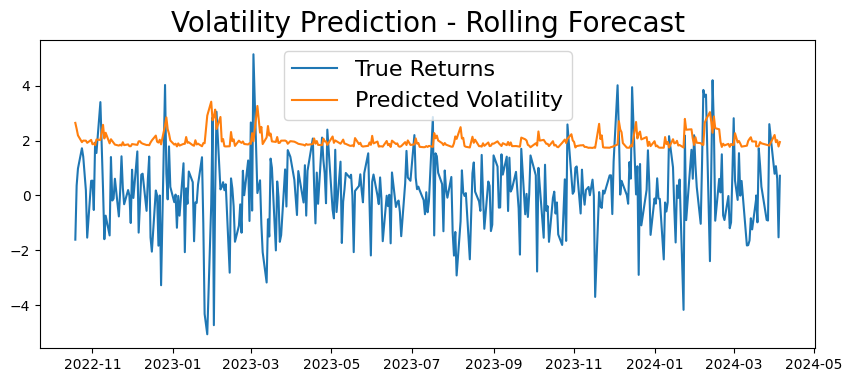

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [16]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [17]:
# spy = web.DataReader('SPY', 'yahoo', start=start, end=end)
spy = pd.read_csv("store1.csv",header=0,index_col=0)
spy["Date"] = pd.to_datetime(spy["Date"])
spy.set_index('Date', inplace=True)
spy.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2004-04-08,1854.00,1864.95,1839.70,1853.55,0
2004-04-12,1860.30,1873.75,1828.95,1838.20,0
2004-04-13,1838.50,1885.15,1819.80,1878.45,0
2004-04-15,1878.50,1884.50,1855.00,1861.95,0
2004-04-16,1863.85,1882.55,1861.80,1868.95,0
2004-04-17,1869.20,1875.95,1864.95,1868.10,0
2004-04-19,1868.20,1876.20,1837.40,1844.05,0
2004-04-20,1844.40,1851.00,1832.00,1844.25,0
2004-04-21,1844.35,1876.00,1838.60,1873.35,0


In [18]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

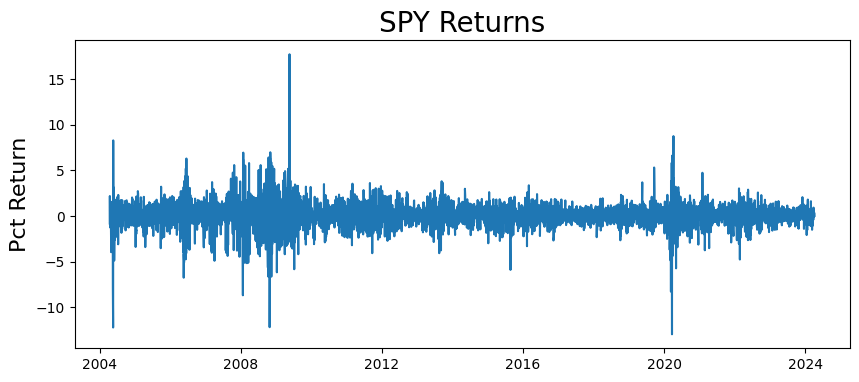

In [19]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

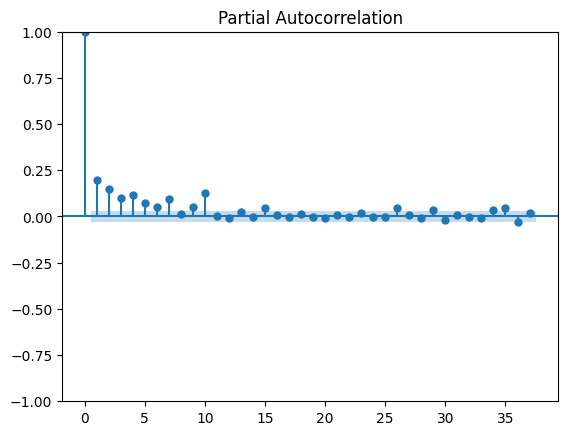

In [20]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [21]:
model = arch_model(returns, p=2, q=2)

In [22]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 45296.084242754245
Iteration:      2,   Func. Count:     20,   Neg. LLF: 29166.148946028996
Iteration:      3,   Func. Count:     31,   Neg. LLF: 1572539041.2094836
Iteration:      4,   Func. Count:     39,   Neg. LLF: 7665.155917891253
Iteration:      5,   Func. Count:     47,   Neg. LLF: 26526.088948422694
Iteration:      6,   Func. Count:     56,   Neg. LLF: 7501.7097756950625
Iteration:      7,   Func. Count:     64,   Neg. LLF: 7666.966376905077
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7489.246439058984
Iteration:      9,   Func. Count:     80,   Neg. LLF: 7488.602320148357
Iteration:     10,   Func. Count:     87,   Neg. LLF: 7536.628591492438
Iteration:     11,   Func. Count:     96,   Neg. LLF: 7509.434136773743
Iteration:     12,   Func. Count:    104,   Neg. LLF: 7488.021449610819
Iteration:     13,   Func. Count:    111,   Neg. LLF: 7490.026421239888
Iteration:     14,   Func. Count:    119,   Neg. LLF: 7487.

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7487.98
Distribution:                  Normal   AIC:                           14988.0
Method:            Maximum Likelihood   BIC:                           15027.0
                                        No. Observations:                 4973
Date:                Mon, Apr 08 2024   Df Residuals:                     4972
Time:                        01:35:06   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0886  1.409e-02      6.291  3.155e-10 [6.102e-02,  0.116]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0351  9.674e-03      3.625  2.892e-04 [1.611e-02,5.403e-02]
alpha[1]       0.0875  1.531e-02      5.715  1.100e-08   [5.747e-02,  0.117]
alpha[2]       0.1041  1.855e-02      5.610  2.027e-08   [6.771e-02,  0.140]
beta[1]        0.0152  4.331e-02      0.350      0.726  [-6.973e-02,  0.100]
beta[2]        0.7778  4.115e-02     18.900  1.143e-79     [  0.697,  0.858]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [24]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [25]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

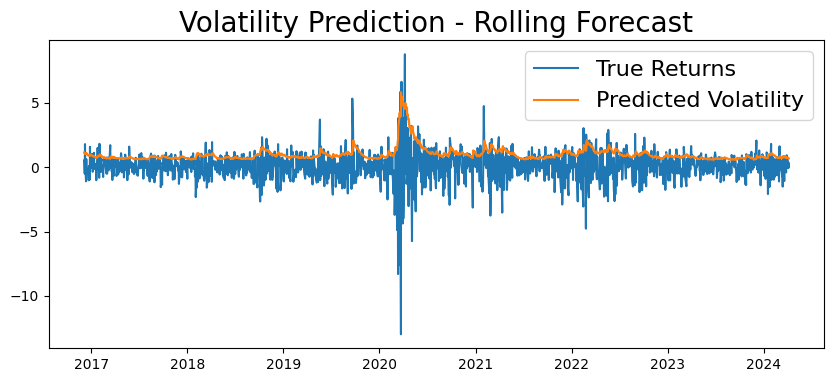

In [26]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [27]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [28]:
from dateutil.relativedelta import relativedelta

In [31]:
pred = model_fit.forecast(horizon=7)
# returns.head()
future_dates = [returns.index[-1] + relativedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

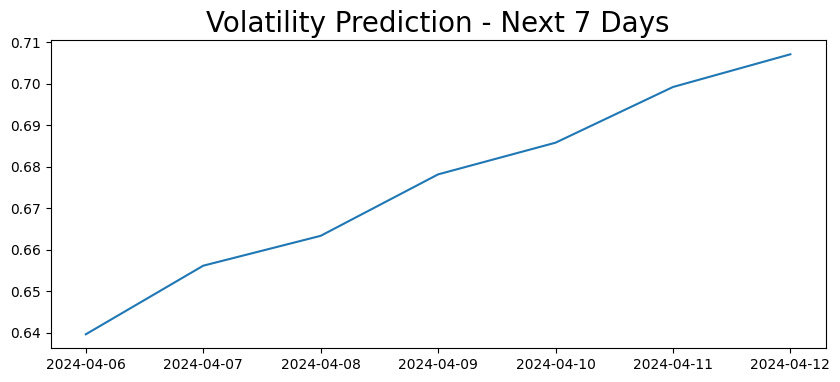

In [32]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)